In [97]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
import os
# change to your local path to project below
project_path = '/home/jorge/Insync/jorgitoje@gmail.com/OneDrive/Documentos/JORGE/EDUCATION/MASTER_DATASCIENCE/Semester1/AdvancedStatistics/GroupProject/KDS_Statistics_GroupProject'

In [98]:

dataset_path = os.path.join( '../datasets/Bike Sharing/')

file_name = 'hour.csv'
df = pd.read_csv(dataset_path+file_name)

In [99]:
X = df.drop(['instant', 'dteday','casual','registered'], axis = 1)
y = df['cnt']

# Cleaning NaNs

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


There is no null in the dataset

[Text(0.5, 1.0, 'Count distribution')]

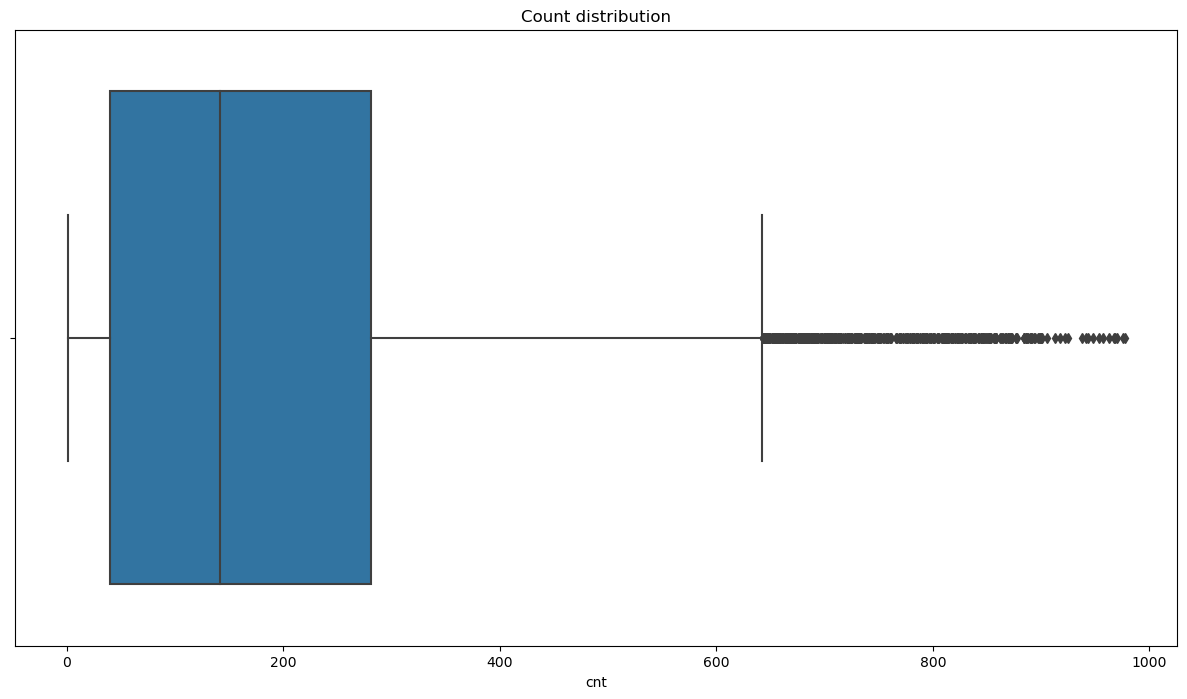

In [101]:
#https://seaborn.pydata.org/generated/seaborn.boxplot.html
plt.figure(figsize=(15,8))
sns.boxplot(x=y).set(title='Count distribution')

There are three big outliers. We should conciderate how to deal with it.

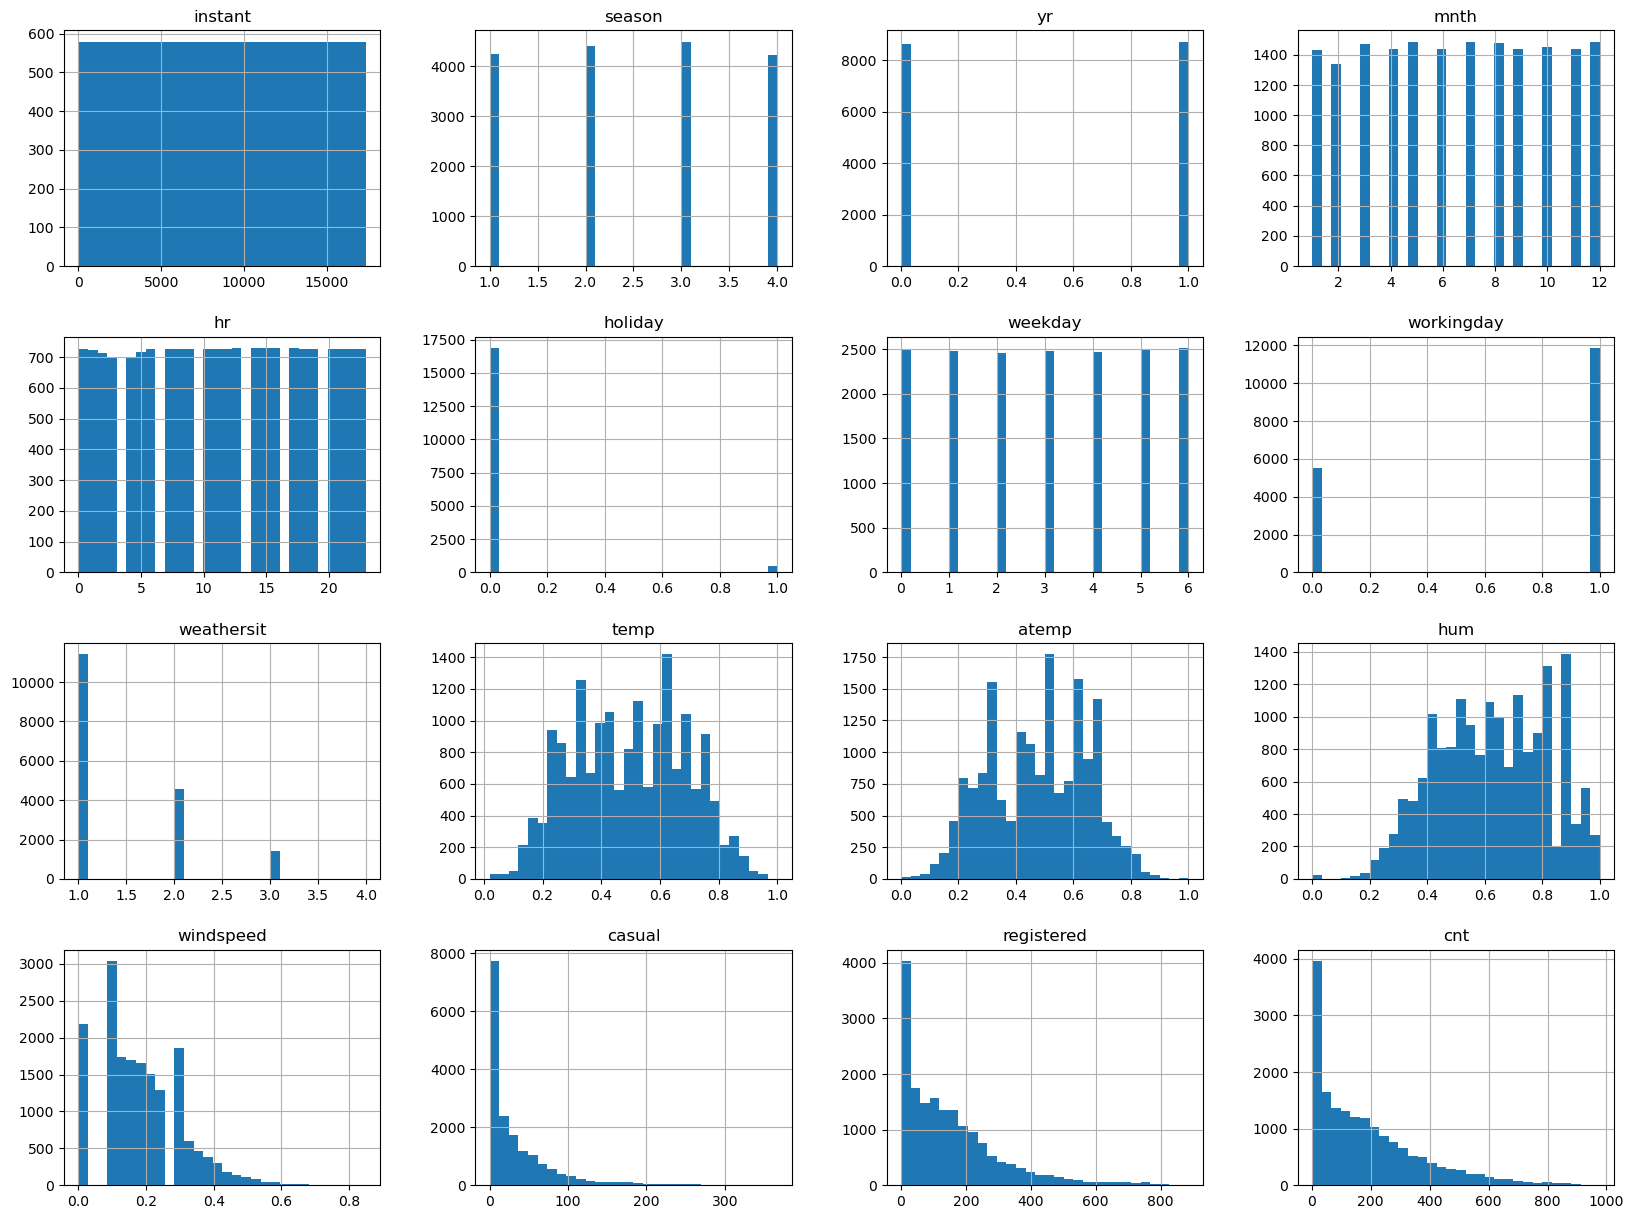

In [102]:
df.hist(bins=30, figsize=(20,15))
plt.show()

# Feature creation

In [103]:
import numpy as np


# Encoding 

Choose encoding

# Scaling

check distribution
https://medium.datadriveninvestor.com/how-would-i-know-if-my-variable-distribution-is-gaussian-c3b215383469

Text(0.5, 1.0, 'price')

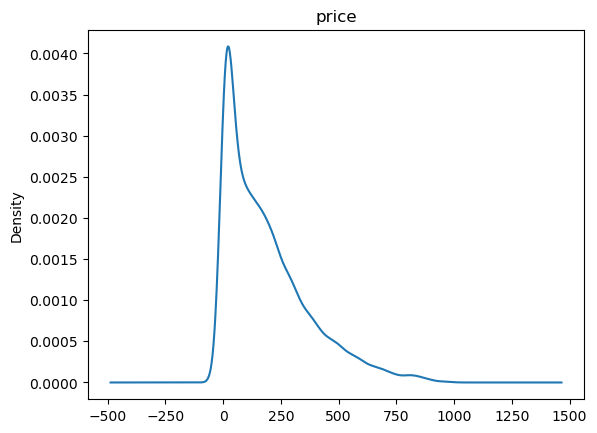

In [104]:
ax = y.plot.kde()
ax.set_title('price')

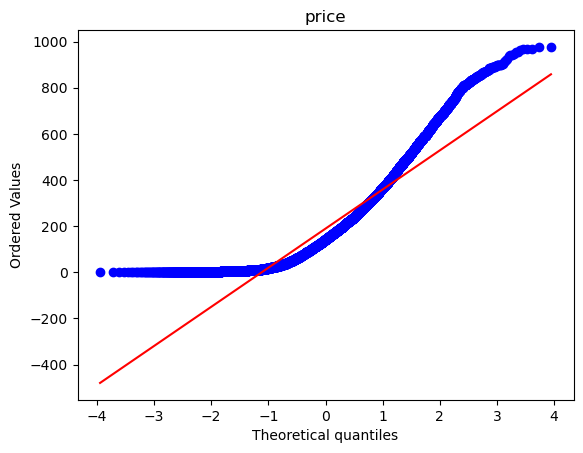

In [105]:
from scipy.stats import probplot
probplot(x=y,dist='norm',plot=plt)
plt.title('price')
plt.show()

In [106]:
to_normalize = X.columns

In [107]:
to_normalize

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [108]:
from scipy.stats import shapiro
print(f'price: {"Not Gaussian" if shapiro(y)[1]<0.05 else "Gaussian"}  {shapiro(y)}')


for col in to_normalize:
    print(f'{col} {"Not Gaussian for" if shapiro(X[col],)[1]<0.05 else "Gaussian"}  {shapiro(X[col])}')


price: Not Gaussian  ShapiroResult(statistic=0.8734657168388367, pvalue=0.0)
season Not Gaussian for  ShapiroResult(statistic=0.8591302633285522, pvalue=0.0)
yr Not Gaussian for  ShapiroResult(statistic=0.6364676356315613, pvalue=0.0)
mnth Not Gaussian for  ShapiroResult(statistic=0.9422010183334351, pvalue=0.0)
hr Not Gaussian for  ShapiroResult(statistic=0.9515238404273987, pvalue=0.0)
holiday Not Gaussian for  ShapiroResult(statistic=0.1545444130897522, pvalue=0.0)
weekday Not Gaussian for  ShapiroResult(statistic=0.9171382784843445, pvalue=0.0)
workingday Not Gaussian for  ShapiroResult(statistic=0.5863296389579773, pvalue=0.0)
weathersit Not Gaussian for  ShapiroResult(statistic=0.6605668663978577, pvalue=0.0)
temp Not Gaussian for  ShapiroResult(statistic=0.9785073399543762, pvalue=1.401298464324817e-44)
atemp Not Gaussian for  ShapiroResult(statistic=0.9813975691795349, pvalue=3.157125440123813e-42)
hum Not Gaussian for  ShapiroResult(statistic=0.9800152778625488, pvalue=2.18602

/Users/mateuszlemanski/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [109]:

from scipy.stats import kstest
normal_dist = y
print(f'{"Not Gaussian" if kstest(normal_dist,"norm")[1]<0.05 else "Gaussian"}  {kstest(normal_dist,"norm")}')

Not Gaussian  KstestResult(statistic=0.9775902020892054, pvalue=0.0)


In [110]:
print(f'{"Not Gaussian" if kstest(y.values,"norm")[1]<0.05 else "Gaussian"}  {kstest(y.values,"norm")}')
for col in to_normalize:
    print(f'{col} {"Not Gaussian for" if kstest(X[col],"norm")[1]<0.05 else "Gaussian"}  {kstest(X[col],"norm")}')

Not Gaussian  KstestResult(statistic=0.9775902020892054, pvalue=0.0)
season Not Gaussian for  KstestResult(statistic=0.8413447460685429, pvalue=0.0)
yr Not Gaussian for  KstestResult(statistic=0.5, pvalue=0.0)
mnth Not Gaussian for  KstestResult(statistic=0.8950241933869955, pvalue=0.0)
hr Not Gaussian for  KstestResult(statistic=0.8938158384758959, pvalue=0.0)
holiday Not Gaussian for  KstestResult(statistic=0.5, pvalue=0.0)
weekday Not Gaussian for  KstestResult(statistic=0.6973778895175331, pvalue=0.0)
workingday Not Gaussian for  KstestResult(statistic=0.5240652708398186, pvalue=0.0)
weathersit Not Gaussian for  KstestResult(statistic=0.8413447460685429, pvalue=0.0)
temp Not Gaussian for  KstestResult(statistic=0.5445646477658006, pvalue=0.0)
atemp Not Gaussian for  KstestResult(statistic=0.543647506263331, pvalue=0.0)
hum Not Gaussian for  KstestResult(statistic=0.5847880337955806, pvalue=0.0)
windspeed Not Gaussian for  KstestResult(statistic=0.5, pvalue=0.0)
cnt Not Gaussian for

In [111]:
from scipy.stats import normaltest
print(f'{"Not Gaussian" if normaltest(y.values,)[1]<0.05 else "Gaussian"}  {normaltest(y.values)}')



for col in to_normalize:
    print(f'{col} {"Not Gaussian for" if normaltest(X[col],)[1]<0.05 else "Gaussian"}  {normaltest(X[col])}')


Not Gaussian  NormaltestResult(statistic=3459.8319080485744, pvalue=0.0)
season Not Gaussian for  NormaltestResult(statistic=1135191.2832432005, pvalue=0.0)
yr Not Gaussian for  NormaltestResult(statistic=59527.00240613511, pvalue=0.0)
mnth Not Gaussian for  NormaltestResult(statistic=15519.469747445452, pvalue=0.0)
hr Not Gaussian for  NormaltestResult(statistic=14976.663541669359, pvalue=0.0)
holiday Not Gaussian for  NormaltestResult(statistic=18303.017224746487, pvalue=0.0)
weekday Not Gaussian for  NormaltestResult(statistic=28426.010419475177, pvalue=0.0)
workingday Not Gaussian for  NormaltestResult(statistic=189921.69292671562, pvalue=0.0)
weathersit Not Gaussian for  NormaltestResult(statistic=2835.1255761787447, pvalue=0.0)
temp Not Gaussian for  NormaltestResult(statistic=2939.4453989959998, pvalue=0.0)
atemp Not Gaussian for  NormaltestResult(statistic=1854.8565754560004, pvalue=0.0)
hum Not Gaussian for  NormaltestResult(statistic=1705.6434642713227, pvalue=0.0)
windspeed 

In [112]:
X

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [113]:
X.columns

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [114]:
from sklearn.preprocessing import MinMaxScaler

to_normalize = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
X_normalized = X[to_normalize]
X_normalized

mm = MinMaxScaler() # creating an instance of the class object
X_normalized = pd.DataFrame(mm.fit_transform(X_normalized), columns=X_normalized.columns)  #fit and transforming MinMaxScaler the dataframe 



## adding price column

X_normalized['cnt'] = y

X_normalized

# x = X_normalized.values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(x)
# X_normalized = pd.DataFrame(x_scaled)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.224490,0.2879,0.81,0.000000,16
1,0.0,0.0,0.0,0.043478,0.0,1.000000,0.0,0.000000,0.204082,0.2727,0.80,0.000000,40
2,0.0,0.0,0.0,0.086957,0.0,1.000000,0.0,0.000000,0.204082,0.2727,0.80,0.000000,32
3,0.0,0.0,0.0,0.130435,0.0,1.000000,0.0,0.000000,0.224490,0.2879,0.75,0.000000,13
4,0.0,0.0,0.0,0.173913,0.0,1.000000,0.0,0.000000,0.224490,0.2879,0.75,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.0,1.0,1.0,0.826087,0.0,0.166667,1.0,0.333333,0.244898,0.2576,0.60,0.193018,119
17375,0.0,1.0,1.0,0.869565,0.0,0.166667,1.0,0.333333,0.244898,0.2576,0.60,0.193018,89
17376,0.0,1.0,1.0,0.913043,0.0,0.166667,1.0,0.000000,0.244898,0.2576,0.60,0.193018,90
17377,0.0,1.0,1.0,0.956522,0.0,0.166667,1.0,0.000000,0.244898,0.2727,0.56,0.157870,61


In [115]:
X_normalized.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.224490,0.2879,0.81,0.0,16
1,0.0,0.0,0.0,0.043478,0.0,1.0,0.0,0.0,0.204082,0.2727,0.80,0.0,40
2,0.0,0.0,0.0,0.086957,0.0,1.0,0.0,0.0,0.204082,0.2727,0.80,0.0,32
3,0.0,0.0,0.0,0.130435,0.0,1.0,0.0,0.0,0.224490,0.2879,0.75,0.0,13
4,0.0,0.0,0.0,0.173913,0.0,1.0,0.0,0.0,0.224490,0.2879,0.75,0.0,1


In [116]:
X.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [117]:
# X_normalized = X_normalized.filter(items=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_basement', 'year_since_1st_renovation', 'city', 'statezip', 'price'])
X_normalized

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0.0,0.0,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.224490,0.2879,0.81,0.000000,16
1,0.0,0.0,0.0,0.043478,0.0,1.000000,0.0,0.000000,0.204082,0.2727,0.80,0.000000,40
2,0.0,0.0,0.0,0.086957,0.0,1.000000,0.0,0.000000,0.204082,0.2727,0.80,0.000000,32
3,0.0,0.0,0.0,0.130435,0.0,1.000000,0.0,0.000000,0.224490,0.2879,0.75,0.000000,13
4,0.0,0.0,0.0,0.173913,0.0,1.000000,0.0,0.000000,0.224490,0.2879,0.75,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.0,1.0,1.0,0.826087,0.0,0.166667,1.0,0.333333,0.244898,0.2576,0.60,0.193018,119
17375,0.0,1.0,1.0,0.869565,0.0,0.166667,1.0,0.333333,0.244898,0.2576,0.60,0.193018,89
17376,0.0,1.0,1.0,0.913043,0.0,0.166667,1.0,0.000000,0.244898,0.2576,0.60,0.193018,90
17377,0.0,1.0,1.0,0.956522,0.0,0.166667,1.0,0.000000,0.244898,0.2727,0.56,0.157870,61


In [118]:
# output_filename = 'USA-HOUSEPRICES-2014-NORMALIZED2".csv'
# X_normalized.to_csv(dataset_path + output_filename, index=False )
X_normalized.to_csv('../datasets/Bike Sharing/preprocessed_hour.csv', encoding='utf-8', index=False)

In [119]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_X = sc_X.fit_transform(pd.DataFrame(y))
print(sc_X)

[[-0.95633924]
 [-0.82402209]
 [-0.8681278 ]
 ...
 [-0.54836135]
 [-0.70824458]
 [-0.77440315]]


[Text(0.5, 1.0, 'Count distribution')]

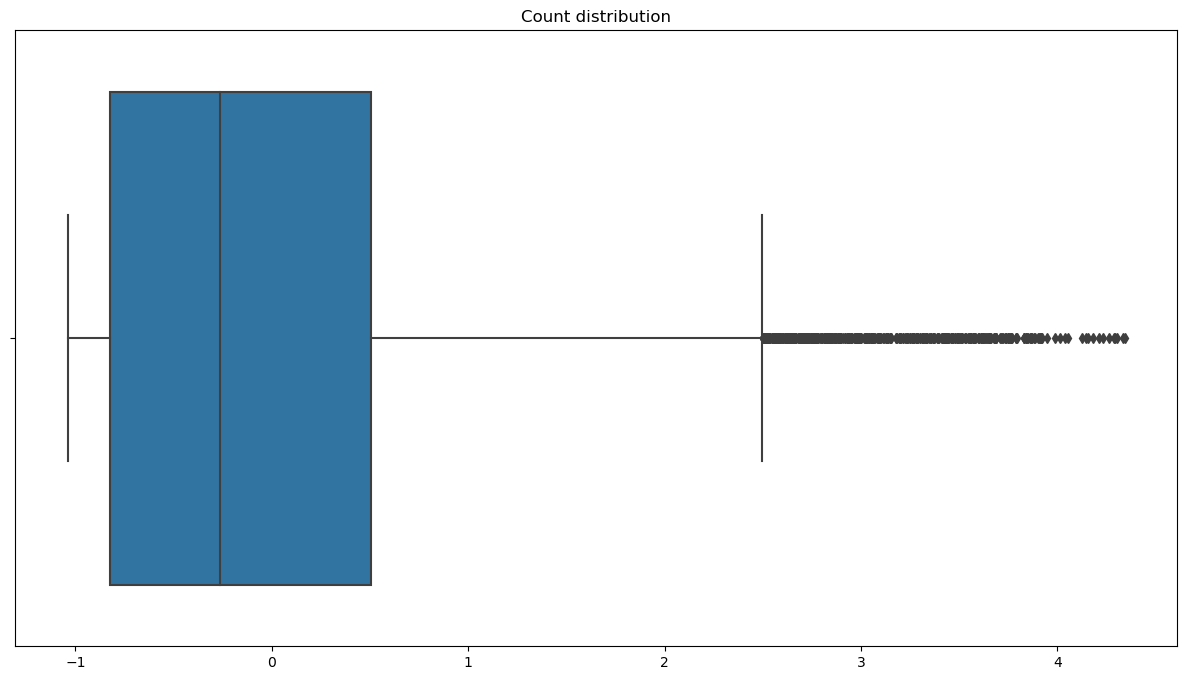

In [120]:
plt.figure(figsize=(15,8))
sns.boxplot(x=sc_X).set(title='Count distribution')

In [121]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# minmax = scaler.fit_transform(pd.DataFrame(y))
# print(minmax)

In [122]:
# plt.figure(figsize=(15,8))
# sns.boxplot(x=minmax).set(title='Price distribution')

# Data exploration

In [123]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [124]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [125]:
list(df.columns)

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']